In [96]:
from flask import Flask, render_template
import pandas as pd
import squarify as sq
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [97]:
playstore = pd.read_csv('data/googleplaystore.csv')
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [98]:
playstore.drop_duplicates(subset = 'App', keep = 'first', inplace = True)

In [99]:
playstore.drop([10472], inplace=True)

In [100]:
playstore.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [101]:
playstore.Category = playstore.Category.astype('category')

In [102]:
playstore.Installs = playstore.Installs.apply(lambda x: x.replace(',', ''))
playstore.Installs = playstore.Installs.apply(lambda x: x.replace('+', ''))

In [103]:
playstore.Installs = playstore.Installs.astype('int64')
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size                object
Installs             int64
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [104]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)

In [105]:
playstore.Price = playstore.Price.apply(lambda x: x.replace('$', ''))
playstore.Price = playstore.Price.astype('float64')

In [106]:
playstore[['Reviews', 'Size', 'Installs']] = playstore[['Reviews', 'Size', 'Installs']].astype('int64')

In [107]:
playstore

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500000,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,13134701,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [108]:
playstore.Category.unique().shape[0]

33

In [109]:
df2 = playstore.copy()

In [110]:
df2.sort_values(by = 'Installs', ascending = False).head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,11307429,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,13134701,1000000000,Free,0.0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device
1654,Subway Surfers,GAME,4.5,27722264,76000000,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,24204410,1000000000,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,11307429,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313,15984089,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2544,Facebook,SOCIAL,4.1,78158306,15984089,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,11307429,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
2554,Google+,SOCIAL,4.2,4831125,15984089,1000000000,Free,0.0,Teen,Social,"July 26, 2018",Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,15792755,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device


In [111]:
top_category = pd.crosstab(index = df2.Category,\
            columns = 'Jumlah',
            values = df2.App,\
            aggfunc = 'count').sort_values(by = 'Jumlah', ascending = False).reset_index()
top_category

col_0,Category,Jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [112]:
top_category.Jumlah.max()

1832

In [113]:
rev_table = df2[['Category', 'App', 'Reviews', 'Rating']].groupby(['Category', 'App']).agg({'Reviews': 'sum','Rating': 'mean'})\
            .sort_values('Reviews', ascending = False).reset_index()\
            .head(10)
rev_table

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306.0,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316.0,4.4
2,SOCIAL,Instagram,66577313.0,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847.0,4.0
4,GAME,Clash of Clans,44891723.0,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526.0,4.7
6,GAME,Subway Surfers,27722264.0,4.5
7,VIDEO_PLAYERS,YouTube,25655305.0,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0,4.7
9,GAME,Clash Royale,23133508.0,4.6


In [114]:
cat_order = df2.groupby('Category').agg({
    'App' : 'count'}).rename({'App':'Total'}, axis=1)\
    .sort_values('Total', ascending = False).head()
cat_order

,Total
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395


In [115]:
X = cat_order.index
Y = cat_order.Total
my_colors = 'rgbkymc'

<ipython-input-116-ee79bbc0aea6>:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(X,Y, color=my_colors)


<BarContainer object of 5 artists>

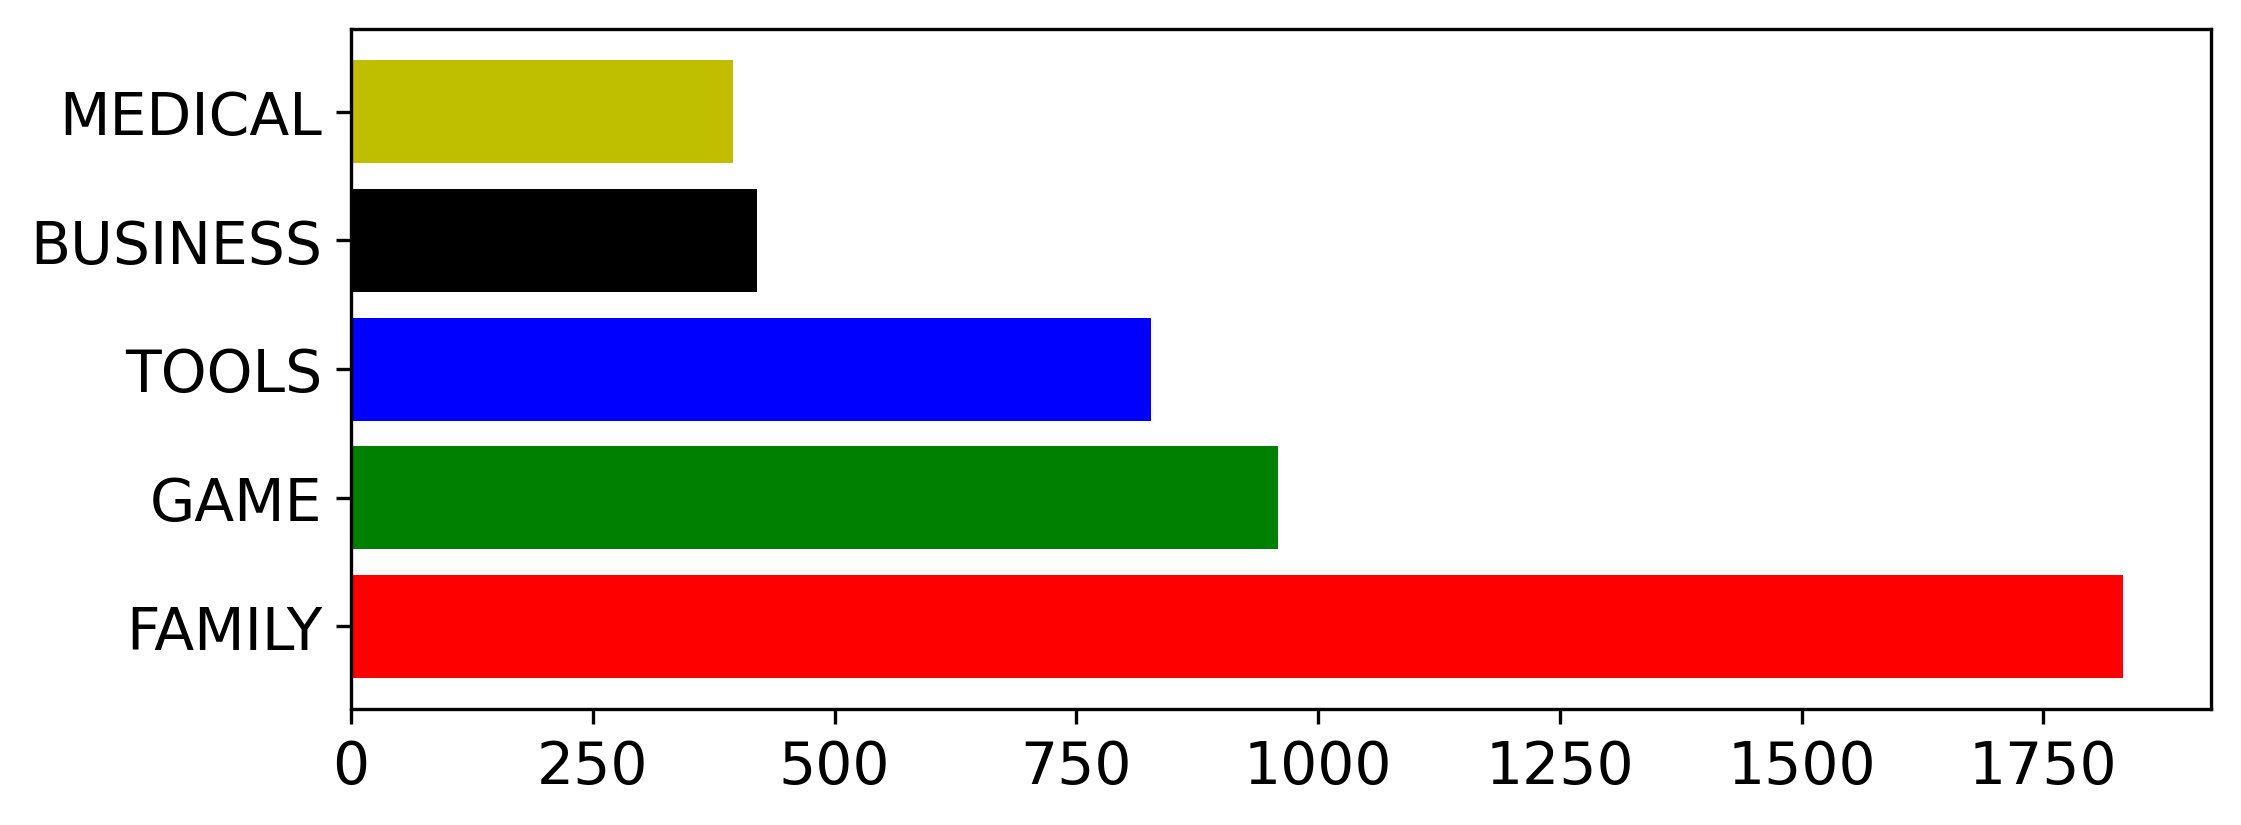

In [116]:
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
plt.barh(X,Y, color=my_colors)

Text(0, 0.5, 'Rating')

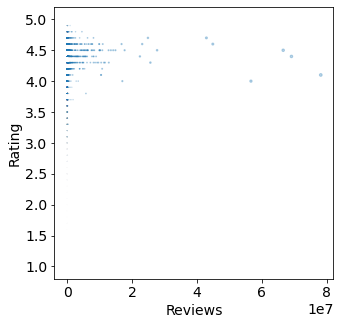

In [117]:
X = df2['Reviews'].values # axis x
Y = df2['Rating'].values # axis y
area = df2['Reviews'].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()

plt.scatter(x=X,y=Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')

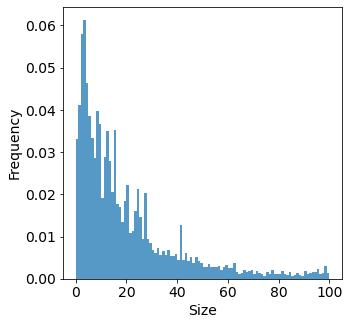

In [118]:
X=(df2.Size/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

In [119]:
tree_map = df2[['Genres', 'App', 'Installs', 'Rating']].groupby(['Genres']).agg({'Installs': 'sum','Rating': 'mean'})\
            .sort_values('Installs', ascending = False).reset_index()\
            .head(10)
tree_map

,Genres,Installs,Rating
0,Communication,11038276251,4.121484
1,Tools,7991771915,4.038912
2,Productivity,5793091369,4.183389
3,Social,5487867902,4.247291
4,Photography,4649147655,4.157414
5,Video Players & Editors,3916902720,4.044898
6,Arcade,3755129155,4.271930
7,Action,3483039190,4.244863
8,Casual,3052830740,4.098089
9,Entertainment,3014714684,4.083439


In [120]:
#tree_map.replace(to_replace ="WhatsApp Messenger", 
                 #value ="WhatsApp", inplace = True) 

In [121]:
#tree_map.loc[tree_map['App'].str.contains('Messenger'), 'App'] = 'Messenger Chat'
tree_map

,Genres,Installs,Rating
0,Communication,11038276251,4.121484
1,Tools,7991771915,4.038912
2,Productivity,5793091369,4.183389
3,Social,5487867902,4.247291
4,Photography,4649147655,4.157414
5,Video Players & Editors,3916902720,4.044898
6,Arcade,3755129155,4.271930
7,Action,3483039190,4.244863
8,Casual,3052830740,4.098089
9,Entertainment,3014714684,4.083439


In [122]:
tree_map.Installs = tree_map.Installs/10**9
tree_map.Installs = tree_map.Installs.round(2)
tree_map.Rating = tree_map.Rating.round(1)

In [123]:
tree_map

,Genres,Installs,Rating
0,Communication,11.04,4.1
1,Tools,7.99,4.0
2,Productivity,5.79,4.2
3,Social,5.49,4.2
4,Photography,4.65,4.2
5,Video Players & Editors,3.92,4.0
6,Arcade,3.76,4.3
7,Action,3.48,4.2
8,Casual,3.05,4.1
9,Entertainment,3.01,4.1


/opt/anaconda3/envs/flask_ui/lib/python3.8/site-packages/squarify/__init__.py:253: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  ax.bar(


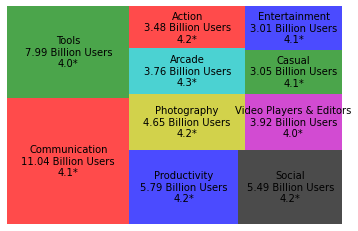

In [124]:
x = tree_map.head(10).Installs
y = ["%s\n%s Billion Users\n%s*" % (label) for label in zip(tree_map.Genres, tree_map.Installs, tree_map.Rating)]
#color_list = ['#0f7216', '#b2790c', '#ffe9a3','#f9d4d4', '#d35158', '#ea3033']

plt.rc('font', size=14)
sq.plot(sizes=x, label=y, color = my_colors, alpha=0.7, bar_kwargs={'alpha':.7}, text_kwargs={'fontsize':10})
plt.axis('off')
plt.show()